In [37]:
from jack_the_dog.socks_env import SocksGridEnv, ACTION
from jack_the_dog.episode_length_wrapper import EpisodeLengthWrapper
from jack_the_dog.auto_socks_wrapper import AutoSocksWrapper
from jack_the_dog.state_index_wrapper import StateIndexWrapper
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output


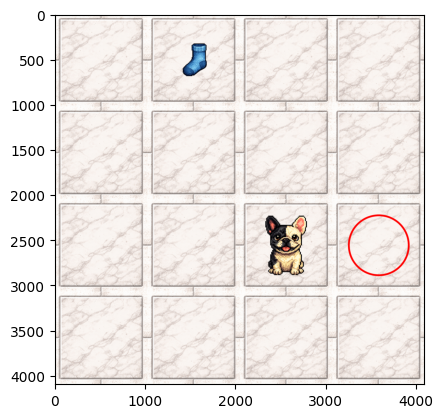

In [38]:
env = SocksGridEnv(use_trash=False, use_snacks=False)
env = EpisodeLengthWrapper(env, max_episode_steps=20)
#env = AutoSocksWrapper(env)
env = StateIndexWrapper(env)

obs, info = env.reset(seed=42)
image = env.render()
plt.imshow(image)
plt.show()





reward= 0
obs= 177


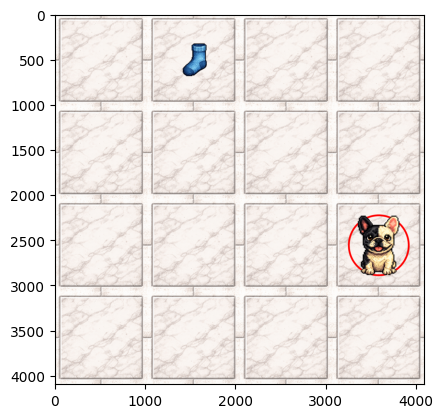

In [39]:
trajectory = [ACTION.LEFT, ACTION.TOP, ACTION.TOP, ACTION.RIGHT, ACTION.RIGHT, ACTION.DOWN, ACTION.DOWN]

for action in trajectory:
    obs, reward, terminated, truncated, info = env.step(action)
    image = env.render()
    print("reward=",reward)
    print("obs=",obs)
    plt.imshow(image)
    plt.show()
    clear_output(True)



In [40]:

def show_progress(rewards_batch, log):
    """Функция отображения прогресса обучения."""
    mean_reward = np.mean(rewards_batch)
    log.append(mean_reward)

    clear_output(True)
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(log, label='Mean rewards')
    plt.legend(loc=4)
    plt.show()

### SARSA

Правило обновление:
$$
Q(s_t, a_t) \leftarrow Q(s_t, a_t) + \alpha \Big[ r_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t) \Big]


**Inputs**
- Environment with states `S`, actions `A`, reward `R`, terminal flag
- Step-size (learning rate) `α ∈ (0, 1]`
- Discount factor `γ ∈ [0, 1]`
- Exploration strategy (e.g., ε-greedy) producing a behavior **strategy** `π(a|s)`
- Initialize action-value function `Q(s, a)` (e.g., zeros)

**Algorithm**
1. For each episode `episode = 1..N`:
   1. Initialize state `s`
   2. Choose action `a ~ π(·|s)` (e.g., ε-greedy w.r.t. `Q`)
   3. Repeat for each step of the episode:
      1. Take action `a`, observe reward `r`, next state `s'`, and `done`
      2. If `done`:
         - Set target `y ← r`
         - Update:
           - `Q(s, a) ← Q(s, a) + α [ y − Q(s, a) ]`
         - Break
      3. Else:
         - Choose next action `a' ~ π(·|s')`
         - Set target `y ← r + γ Q(s', a')`
         - Update:
           - `Q(s, a) ← Q(s, a) + α [ y − Q(s, a) ]`
         - Move to next transition:
           - `s ← s'`, `a ← a'`

**Output**
- Learned action-value function `Q`
- Induced greedy **strategy** `π_greedy(s) = argmax_a Q(s, a)`


In [43]:
# Task - 1
# write a code for Q-table initialization
# size of Q-table is n_observation_space x n_action_space
# initialize Q-table with zeros
# fill diagonal with 1/n_action_space

def initialize_q_table(n_observation_space, n_action_space):
    # Q = [state][action]
    """<codehere>"""
    shape = n_observation_space, n_action_space
    Q = np.zeros(shape)
    Q[:,:] =  1/n_action_space
    """</codehere>"""
    return Q

In [44]:
n_observation_space = len(env.get_all_states())
n_action_space = len(env.get_possible_actions(env.get_all_states()[0])) 
q_table = initialize_q_table(n_observation_space, n_action_space)


print(q_table.shape)


(273, 6)


In [45]:
def select_action_eps_greedy(Q, state, epsilon):
    # выбираем действие, используя eps-greedy исследование среды:
    # 1) с вероятностью epsilon выбираем случайное действие,
    # 2) иначе выбираем действие жадно
    # action = 
   # print("Q-shape", Q.shape)
    """<codehere>"""
    if epsilon < np.random.random():
        # используем Q-функцию
       # print("Q[state]=",Q[state])
        action = np.argmax(Q[state])
    else:
       # print("Q.shape[1]=",Q.shape[1])
        action = np.random.choice(Q.shape[1])
    """</codehere>"""
    return action

In [46]:
def update_Q(Q, s, a, r, next_s, alpha, gamma, epsilon):
    # alpha: learning rate, gamma: discount factor
    # вычисли V(next_s) - estimate of optimal future value
    # V_ns = 
    """<codehere>"""
    action = select_action_eps_greedy(Q, next_s, epsilon)
    V_ns = Q[next_s, action]
    """</codehere>"""

    # посчитай TD ошибку
    # td_error = 
    """<codehere>"""
    #print("s=",s)
   # print("a=",a)
    td_error = r + gamma * V_ns - Q[s, a]
    """</codehere>"""

    # обновление Q-функции
    Q[s, a] += alpha * td_error

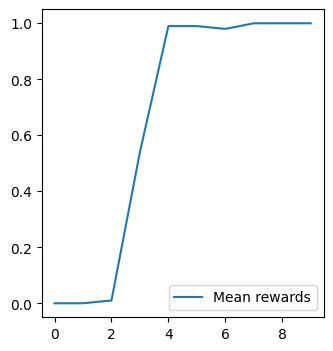

Episode: 1000, Reward: 1, Eps: 0.03874204890000002


In [49]:

# определяем память, в которой будет храниться Q(s,a)
Q = initialize_q_table(n_observation_space, n_action_space)
log = []
rewards_batch = []

# гиперпараметры алгоритма
alpha = 0.1
gamma = 0.9
epsilon = 0.1
epsilon_decay = 0.9
n_episodes = 1000

for i_episode in range(1, n_episodes + 1):
  #  print(i_episode)
    s, _ = env.reset(seed=42)

    r, episode_reward = 0, 0
    done = False

    while not done:
        # select action eps-greedy
        # a = ...
        """<codehere>"""
        a = select_action_eps_greedy(Q, s, epsilon)
        """</codehere>"""
       # print("a=",a)
        # выполняем действие в среде 
        next_s, r, terminated, truncated, _ = env.step(a)
 
        done = terminated or truncated
        # Update Q-function
        """<codehere>"""
        update_Q(Q, s, a, r, next_s, alpha, gamma, epsilon)
        """</codehere>"""

        s = next_s
        episode_reward += r
   # print("episode_reward=",episode_reward)
    rewards_batch.append(episode_reward)
    if i_episode % 100 == 0:
        show_progress(rewards_batch, log)
        rewards_batch = []
        print(
            f"Episode: {i_episode}, Reward: {episode_reward}"
            f", Eps: {epsilon}"
        )
        epsilon *= epsilon_decay
        
    

In [50]:
s, _ = env.reset(seed=42)
done = False
while not done:
    a = select_action_eps_greedy(Q, s, epsilon=0.01)
    next_s, r, terminated, truncated, _ = env.step(a)
    done = terminated or truncated
    s = next_s
    img = env.render()
    plt.imshow(img)
    plt.show()
    clear_output(True)
    
if terminated:
    print("Good job, Jack!")
else:
    print("Try again!")




Good job, Jack!
